In [ ]:
#SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

print(__doc__)
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn

Automatically created module for IPython interactive environment


In [2]:
dataset = pd.read_csv("Data.csv", delimiter=",")

In [3]:
dataset = dataset.drop('revid', 1)
dataset = dataset.drop('commitid', 1)


dataset = dataset.drop('paxcapacity', 1)
dataset = dataset.drop('duplicate', 1)
dataset.shape


(19283, 13)

In [ ]:
sns.pairplot(dataset, hue='selectedoption')

Text(0.5,1,'Heatmap of Correlation Matrix')

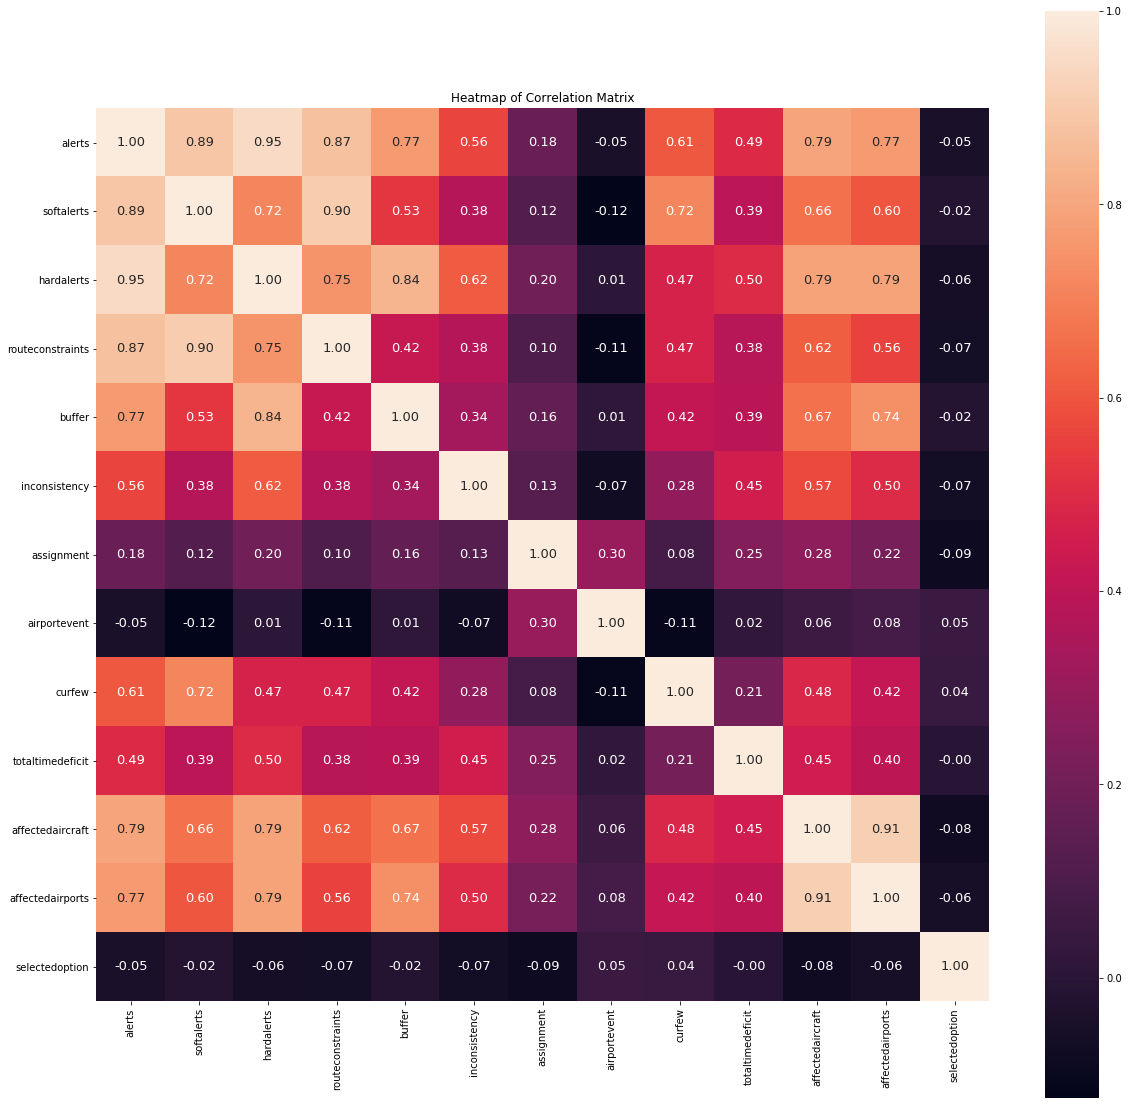

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr=dataset.corr()
corr = (corr)
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=dataset.iloc[:,:11].values
Y=dataset.iloc[:,12:13].values



In [7]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
lw = 2
# Binarize the output
Y = label_binarize(Y, classes=[0, 1])
n_classes = Y.shape[1]

In [8]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state= random_state)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

estimator = SVC(kernel='linear')
selector = estimator.fit(X_train,y_train)
#print(X_train.columns[selector.support_])
y_predict_test = selector.predict(X_test)
y_predict_train = selector.predict(X_train)
#classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 #random_state=random_state))
#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
#print(X_train.columns[selector.support_])

C:\Users\saisrivatsava.mancha\conda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
print("Train Accuracy Score:", accuracy_score(y_train, y_predict_train))
print("Test Accuracy Score:", accuracy_score(y_test, y_predict_test))

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report as cr, accuracy_score as asc
pr=estimator.predict(X_test)
pr
CM = confusion_matrix(y_test, pr)

CM

In [ ]:
print(asc(y_test,pr))


In [ ]:
print(cm(y_test,pr))


In [ ]:
print(cr(y_test,pr))

In [ ]:
from sklearn.grid_search import GridSearchCV

In [ ]:
param_grid={'C':[1,10,100,0.1,0.01],'gamma':[1,10,0.1,0.01,0.001,0.0001]}
grid=GridSearchCV(SVC(),param_grid,verbose=3,refit=True)